In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot

In [11]:
participants = pd.read_csv('participants.csv')
trials = pd.read_csv('trials.csv')

merged = trials.merge(participants, on='id')

# trials.groupby(by='id').describe()
summary = merged.groupby(by='condition').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std),
    age=pd.NamedAgg('age', np.mean)
)

summary.reset_index(inplace=True)


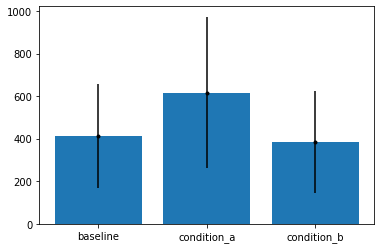

In [16]:
plt.figure()
plt.bar(summary['condition'], summary['mean_RT'])
plt.errorbar(summary['condition'], summary['mean_RT'], summary['std_RT'], fmt='k.')
plt.show()

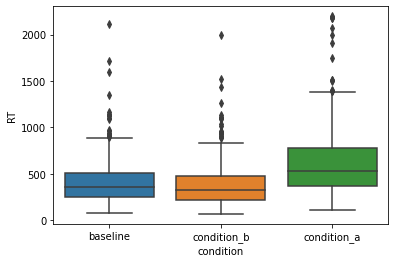

In [18]:
sns.boxplot(x='condition', y='RT', data=trials)
plt.show()

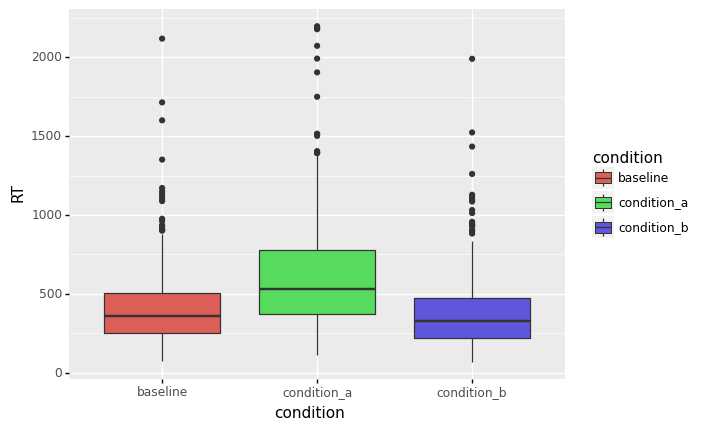

In [20]:
plot = (
    ggplot(gg.aes(x='condition', y='RT'), data=trials) +
    gg.geom_boxplot(gg.aes(fill='condition'))
)
plot.draw()
plt.show()